In [2]:
# import ggplot
import pandas as pd
import seaborn as sns

In [3]:
with open('bach-chordsequence.txt', 'r') as f:
    BACH = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
with open('handel-chordsequence.txt', 'r') as f:
    HANDEL = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
# with open('beethoven-chordsequence.txt', 'r') as f:
#     BEETHOVEN = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
# with open('debussy-chordsequence.txt', 'r') as f:
#     DEBUSSY = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
# with open('scarlatti-chordsequence.txt', 'r') as f:
#     SCARLATTI = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
# with open('victoria-chordsequence.txt', 'r') as f:
#     VICTORIA = [piece.strip('[]\n').split(', ') for piece in f.readlines()]

In [4]:
labels = ['composer','length']
df = pd.DataFrame.from_records([('bach', len(piece)) for piece in BACH] +
                              [('handel', len(piece)) for piece in HANDEL], columns = labels)

#                                [('beethoven', len(piece)) for piece in BEETHOVEN] +
#                                [('debussy', len(piece)) for piece in DEBUSSY] +
#                                [('scarlatti', len(piece)) for piece in SCARLATTI] +
#                                [('victoria', len(piece)) for piece in VICTORIA], columns = labels)
df.describe(percentiles=[.1, .25, .5, .75, .90])

length
count   376.000000
mean    306.226064
std     291.841307
min      60.000000
10%     104.000000
25%     144.000000
50%     244.000000
75%     376.250000
90%     535.000000
max    4206.000000

In [5]:
from collections import Counter
flatten = lambda l: [item for sublist in l for item in sublist]

In [6]:
bach_chords = flatten(BACH)
handel_chords = flatten(HANDEL)

# beethoven_chords = flatten(BEETHOVEN)
# debussy_chords = flatten(DEBUSSY)
# scarlatti_chords = flatten(SCARLATTI)
# victoria_chords = flatten(VICTORIA)

for cnt in [Counter(bach_chords),Counter(handel_chords)]:
    print(pd.DataFrame.from_dict(cnt.most_common())[1].describe())

count     176.000000
mean      270.772727
std       398.952349
min         1.000000
25%        45.750000
50%       127.500000
75%       324.250000
max      2553.000000
Name: 1, dtype: float64
count     174.000000
mean      387.844828
std       608.211777
min         1.000000
25%        45.250000
50%       154.000000
75%       456.250000
max      3677.000000
Name: 1, dtype: float64


In [7]:
with open('mxl_list.txt', 'r') as f:
    files = [line.replace('-', '_').split('_')[0].strip('()') for line in f.readlines()]

In [8]:
Counter(files).most_common()

[('handel', 218), ('bach', 214)]

In [15]:
# labels = ['composer','length']
# df = pd.DataFrame.from_records([('bach', len(piece)) for piece in BACH] +
#                               [('handel', len(piece)) for piece in HANDEL], columns = labels)

display(df)

composer  length
0       bach     260
1       bach     255
2       bach     324
3       bach     676
4       bach     387
5       bach     510
6       bach     364
7       bach     192
8       bach     308
9       bach     523
10      bach     192
11      bach     439
12      bach     231
13      bach     655
14      bach     312
15      bach     386
16      bach     316
17      bach      60
18      bach     148
19      bach      64
20      bach     100
21      bach     100
22      bach     360
23      bach     632
24      bach     256
25      bach     360
26      bach     288
27      bach     520
28      bach     480
29      bach     522
..       ...     ...
346   handel     398
347   handel     129
348   handel     135
349   handel     380
350   handel     778
351   handel     186
352   handel     112
353   handel     436
354   handel     514
355   handel     320
356   handel     220
357   handel     436
358   handel     768
359   handel     128
360   handel     513
361   handel     540
362   handel     452
363   handel     257
364   handel     486
365   handel    1692
366   handel     333
367   handel     629
368   handel     258
369   handel     395
370   handel     176
371   handel     596
372   handel     316
373   handel     504
374   handel     912
375   handel     912

[376 rows x 2 columns]

In [ ]:
# Below is just poking around the data

(array([319.,  49.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  60. ,  474.6,  889.2, 1303.8, 1718.4, 2133. , 2547.6, 2962.2,
        3376.8, 3791.4, 4206. ]),
 <a list of 10 Patch objects>)

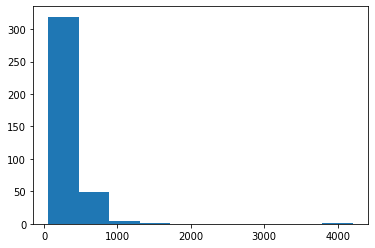

In [14]:
# plot = ggplot(aes(x='length', color='composer'), data=df) + geom_density() + ylab('density')
# plot.save('density.png', width=8, height=6, dpi=180)
import matplotlib.pyplot as plt

# plot = sns.kdeplot(x=df['length'], shade=True, data=df['composer'])
plt.hist(df['length'])



In [ ]:
plot = ggplot(aes(x='length', fill='composer', color='composer'), data=df) + geom_histogram(binwidth=100, alpha=0.5) + \
ylab('# pieces')
plot.save('histogram.png', width=6, height=6, dpi=180)

In [ ]:
ggplot(df, aes(x='length')) + \
    geom_histogram(binwidth=100, alpha=0.6) + \
    facet_wrap("composer", scales="free")